In [2]:
library(ggplot2)

## Solution 1: ROC metrics

### a)

First, sort the table:

| ID  | True class | Score | Predicted class |
| --- | ---------- | ----- | --------------- |
| 6   | 1          | 0.63  | 1               |
| 7   | 1          | 0.62  | 1               |
| 10  | 0          | 0.57  | 1               |
| 4   | 1          | 0.38  | 0               |
| 1   | 0          | 0.33  | 0               |
| 8   | 1          | 0.33  | 0               |
| 2   | 0          | 0.27  | 0               |
| 5   | 1          | 0.17  | 0               |
| 9   | 0          | 0.15  | 0               |
| 3   | 0          | 0.11  | 0               |

| _ | True 1 | True 0 |
| ---- | ------ | ------ |
| Predicted 1 | 2 | 1 |
| Predicted 0 | 3 | 4 |

so we get

| FN | FP | TN | TP |
| -- | -- | -- | -- |
| 3  | 1  | 4  | 2  |

### b)

- PPV ($\rho_{\text{PPV}}$) = $\frac{\text{TP}}{\text{TP} + \text{FP}} = \frac{2}{3}$
- NPV ($\rho_{\text{NPV}}$) = $\frac{\text{TN}}{\text{TN} + \text{FN}} = \frac{4}{7}$
- TPR ($\rho_{\text{TPR}}$) = $\frac{\text{TP}}{\text{TP} + \text{FN}} = \frac{2}{5}$
- FPR ($\rho_{\text{FPR}}$) = $\frac{\text{FP}}{\text{TN} + \text{FP}} = \frac{1}{5}$
- ACC ($\rho_{\text{ACC}}$) = $\frac{\text{TP} + \text{TN}}{\text{TP} + \text{TN} + \text{FP} + \text{FN}} = \frac{6}{10}$
- MCE ($\rho_{\text{MCE}}$) = $\frac{\text{FP} + \text{FN}}{\text{TP} + \text{TN} + \text{FP} + \text{FN}} = \frac{4}{10}$
- F1 Score ($\rho_{F1}$) = $\frac{2 \cdot \rho_{\text{PPV}} \cdot \rho_{\text{TPR}}}{\rho_{\text{PPV}} + \rho_{\text{TPR}}} = 0.5$

### c)

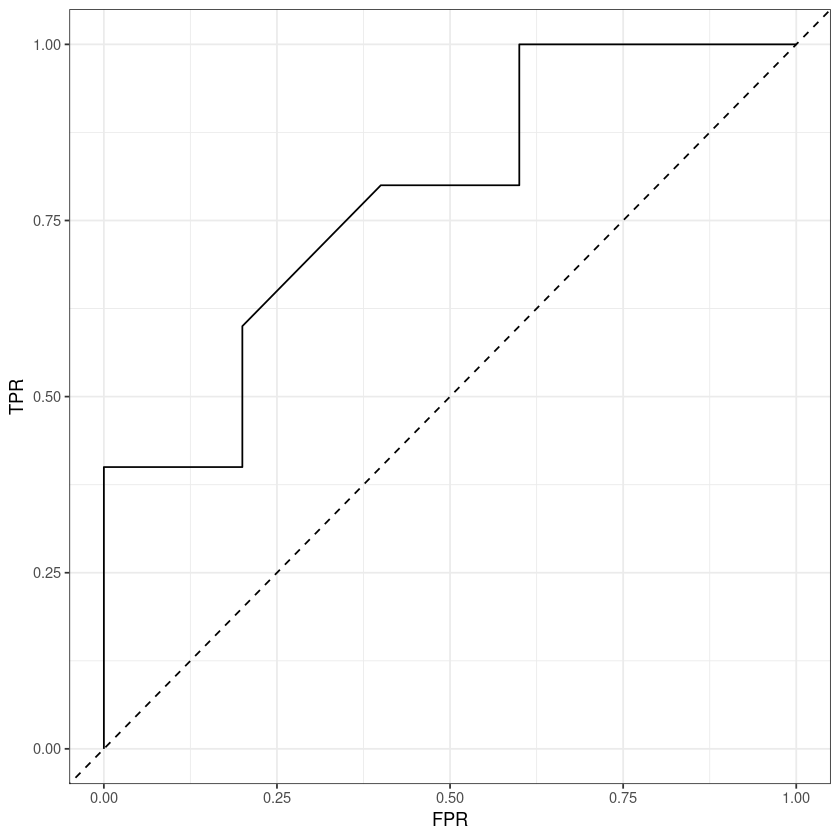

In [4]:
#| label: roc-r
roc_data <- data.frame(
  TPR = c(0, 0.2, 0.4, 0.4, 0.6, 0.8, 0.8, 1, 1, 1),
  FPR = c(0, 0, 0, 0.2, 0.2, 0.4, 0.6, 0.6, 0.8, 1)) 

ggplot(roc_data, aes(x = FPR, y = TPR)) + geom_line() + 
  geom_abline(slope = 1, intercept = 0, linetype = 'dashed') +
  theme_bw()

We see that the resulting ROC curve is distinct from the diagonal marking a purely random classifier, but also not too great. The step function character is clearly visible for so few observations (the non-axis-parallel part in the middle is due to the fact that we have two observations with the same score but different true class, so both TPR and FPR go up when we move from $c = 0.35$ to $c= 0.3$).

### d)

The AUC computation involves adding rectangular and triangular areas, resulting in $\rho_{\text{AUC}} = 0.78$.

### e)

The performance indicated by the ROC curve and AUC is independent of any specific choice of threshold $c$.